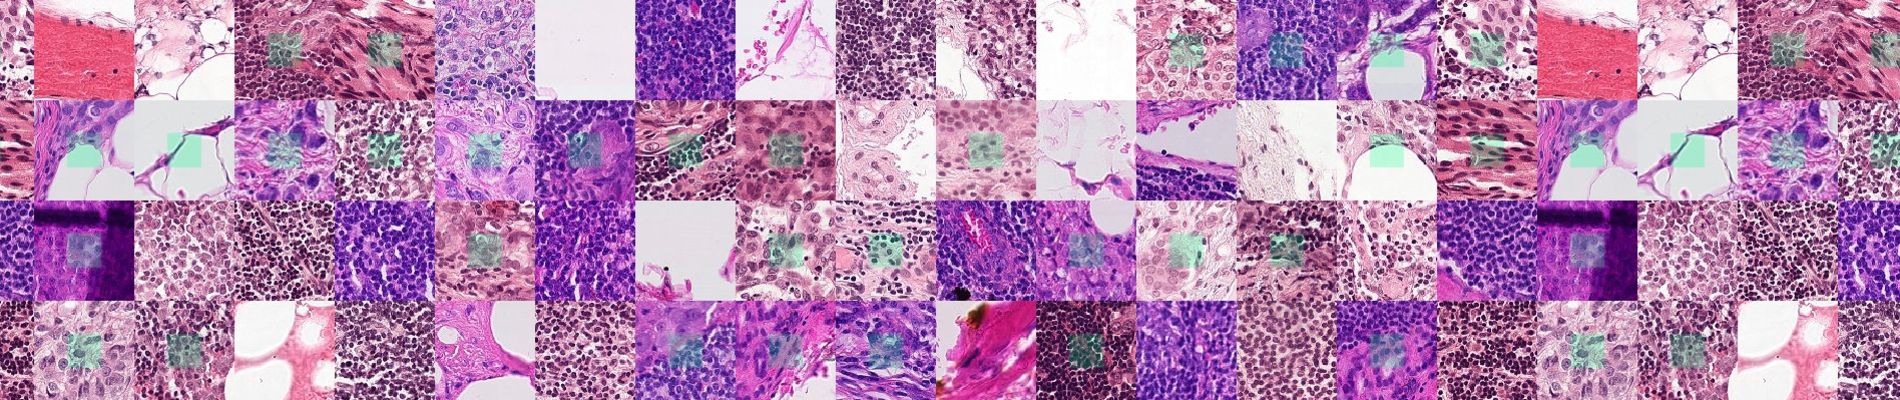

####  - OBJETIVO DO EXERCÍCIO É REALIZAR UMA CLASSIFICAÇÃO ENTRE CÂNCER BENIGNO E CÂNCER MALIGNO A PARTIR DE DIFERENTES CLASSIFICADORES.

##### - IMPORTAR OS DADOS;
##### - REALIZAR UMA ANÁLISE EXPLORÁTORIA DOS DADOS;
##### - IDENTIFICAR AS VARIÁVEIS EXPLICATIVAS E A VARIÁVEL RESPOSTA;
##### - REALIZAR A DIVISÃO ENTRE A AMOSTRA DE TREINO E AMOSTRA DE TESTE;
##### - VERIFICAR SE SUA VARIÁVEL RESPOSTA ESTÁ BALANCEADA OU DESBALANCEADA E SE SERÁ NECESSÁRIO IMPLEMENTAR ALGUM ALGORITMO DE OVERSAMPLING;
##### - IMPORTAR O MODELO DE REGRESSÃO LOGÍSTICA, SUPORTE DE VETORES DE MÁQUINA, K-NN E CLASSIFICADOR BAYESIANO DO SCIKIT-LEARN
##### - AVALIAR O MODELO POR MEIO DAS MÉTRICAS DE PRECISION, RECALL , ACCURACY, CURVA ROC E PLOTAR A MATRIZ DE CONFUSÃO.





### INFORMAÇÕES DO DATASET:

1) ID number

2) Diagnosis (M = malignant, B = benign)


Parametros a serem considerados: ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values) 
c) perimeter
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### ARTIGOS ACADÊMICOS QUE UTILIZARAM O DATASET PARA ANÁLISE. 

Gavin Brown. Diversity in Neural Network Ensembles. The University of Birmingham. 2004. [View Context].

Krzysztof Grabczewski and Wl/odzisl/aw Duch. Heterogeneous Forests of Decision Trees. ICANN. 2002. [View Context].

András Antos and Balázs Kégl and Tamás Linder and Gábor Lugosi. Data-dependent margin-based generalization bounds for classification. Journal of Machine Learning Research, 3. 2002. [View Context].

Kristin P. Bennett and Ayhan Demiriz and Richard Maclin. Exploiting unlabeled data in ensemble methods. KDD. 2002. [View Context].

Hussein A. Abbass. An evolutionary artificial neural networks approach for breast cancer diagnosis. Artificial Intelligence in Medicine, 25. 2002. [View Context].

Baback Moghaddam and Gregory Shakhnarovich. Boosted Dyadic Kernel Discriminants. NIPS. 2002. [View Context].

Robert Burbidge and Matthew Trotter and Bernard F. Buxton and Sean B. Holden. STAR - Sparsity through Automated Rejection. IWANN (1). 2001. [View Context].

Nikunj C. Oza and Stuart J. Russell. Experimental comparisons of online and batch versions of bagging and boosting. KDD. 2001. [View Context].

Yuh-Jeng Lee. Smooth Support Vector Machines. Preliminary Thesis Proposal Computer Sciences Department University of Wisconsin. 2000. [View Context].

### Importar Bibliotecas e definir parâmetros técnicos

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,precision_recall_curve
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings

In [169]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (4, 4),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams.update(params)

### IMPORTAR OS DADOS


In [74]:
cancer = pd.read_csv(r'cancer.csv')

In [75]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [76]:
cancer = cancer.iloc[:,1:-1]

In [77]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### VERIFICANDO SE EXISTEM CAMPOS NULOS

In [79]:
print(cancer.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### PROPORÇÃO DAS CLASSES 

Text(0, 0.5, 'Frequency')

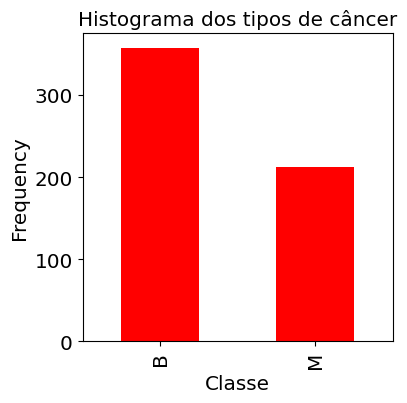

In [171]:
count_classes = pd.value_counts(cancer['diagnosis'], sort = True).sort_index()
count_classes.plot(kind = 'bar', color = 'red')
plt.title("Histograma dos tipos de câncer")
plt.xlabel("Classe")
plt.ylabel("Frequency")

### CORRELAÇÃO DAS VARIÁVEIS

In [83]:
cancorr = cancer
cancorr['diagnose_num'] = [1 if x == 'M' else 0 for x in cancorr['diagnosis']]
cancer_corr = cancorr.iloc[:,1:]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnose_num
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


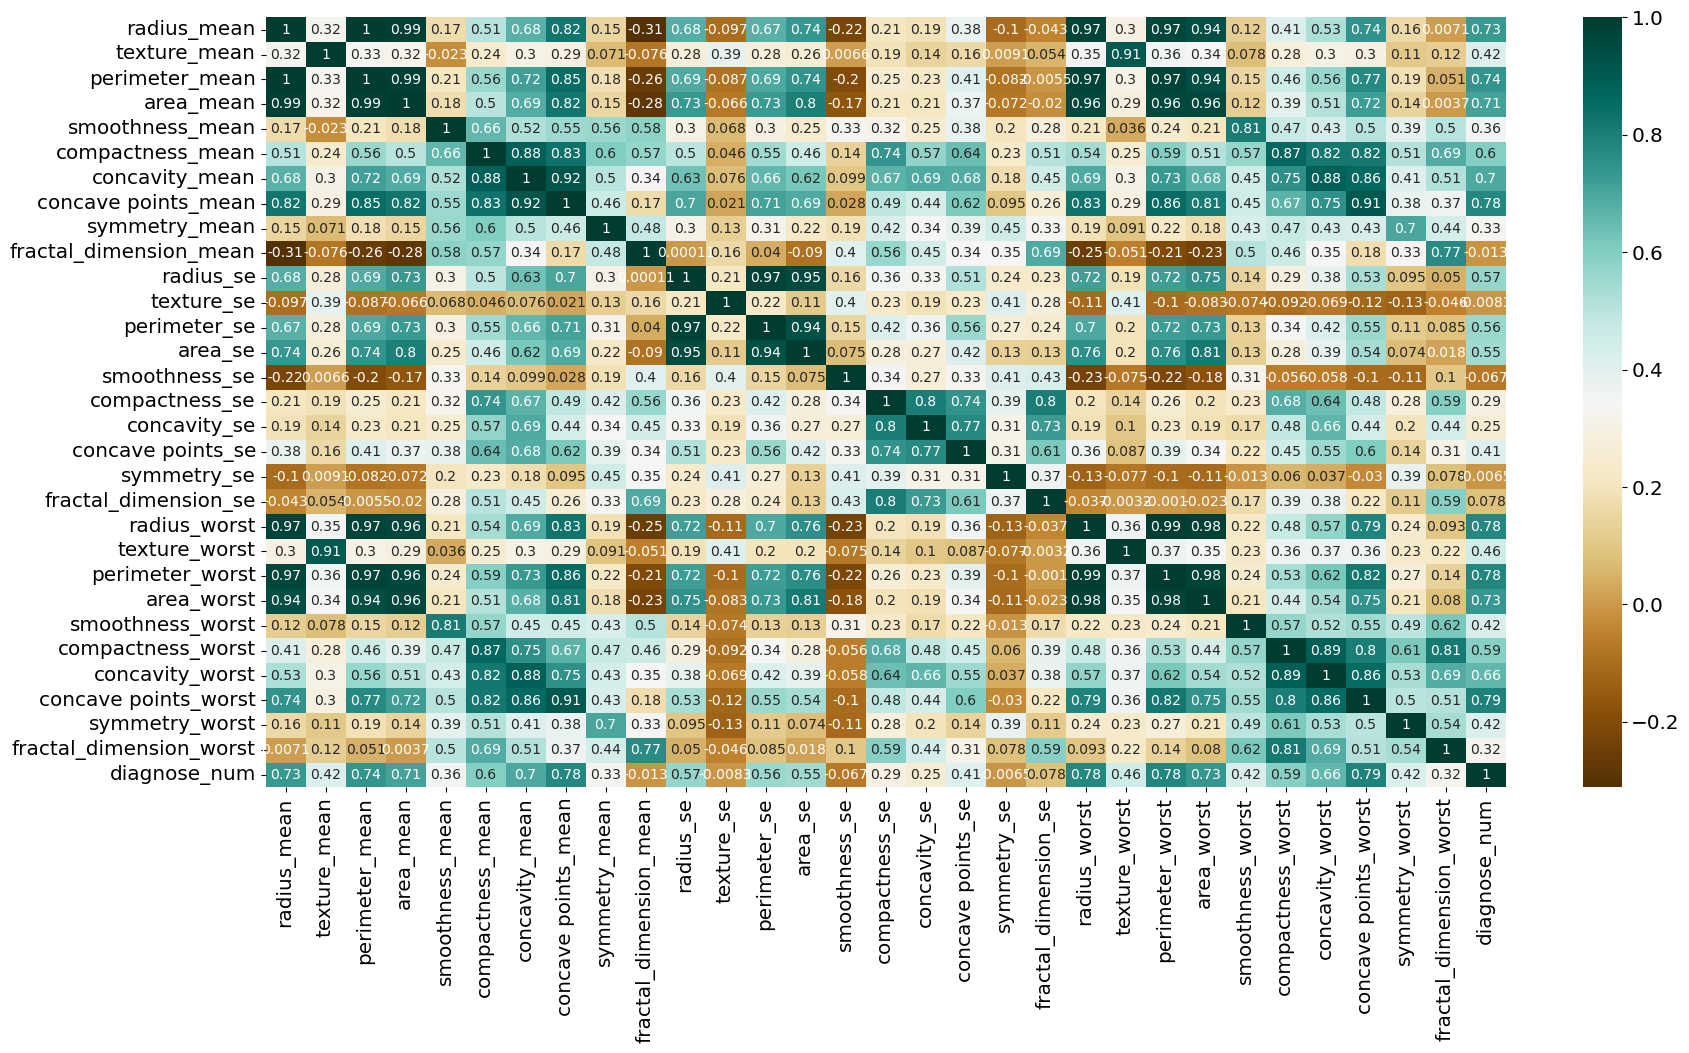

In [93]:
plt.figure(figsize=(20,10))
c = cancer_corr.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

### TESTE DE COMPARAÇÃO DE MÉDIAS 

Serão comparados as áreas médias do câncer benigno e maligno. 

### DEFININDO AS VARIÁVEIS EXPLICATIVAS E VARIÁVEIS RESPOSTA

In [97]:
y = cancer.loc[:,'diagnosis']
X = cancer.drop(['diagnosis'],axis=1)

### BINARIZAR A VARIÁVEL RESPOSTA

In [100]:
le = preprocessing.LabelBinarizer()
y = le.fit_transform(y)
y = np.ravel(y)

### APLICANDO A DIVISÃO DE AMOSTRA DE TREINO E AMOSTRA DE TESTE E O AJUSTE DE ESCALA POR MEIO DO STANDARD SCALER.

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
sc = StandardScaler() 
sc.fit(X_train)
X_train_st = sc.transform(X_train) 
X_test_st = sc.transform(X_test)

### IMPORTANDO O PACOTE PARA APLICAR O PCA

In [106]:
pca = PCA(n_components=0.90)
pca.fit(X_train_st)
pca.fit_transform(X_test_st)

array([[-1.06739999e+00,  7.04907600e-01, -5.92708320e-01,
         1.95229909e-01, -2.37847181e-01, -1.22013008e-01],
       [ 3.09472524e+00, -4.17603503e+00, -7.65862691e-01,
        -1.01238516e+00, -1.53417769e-01, -1.94012164e-01],
       [ 1.68543386e+00, -7.07954361e-01, -1.24946903e+00,
        -1.89692746e-01, -5.84003672e-01, -1.33279473e+00],
       [-1.33275821e+00,  2.21872236e+00,  2.05254428e-01,
         1.69297014e-01,  1.27874735e+00,  5.58298804e-02],
       [-2.14181680e+00,  1.90275407e+00,  3.45433581e-01,
        -7.69353390e-01,  2.25181939e+00,  2.54971531e-02],
       [ 1.03024375e+01,  2.23352822e+00,  9.02892882e-01,
         2.24483868e+00, -1.03662854e+00,  7.05011738e-01],
       [ 7.49364024e+00, -2.85320546e+00, -1.29255581e+00,
        -1.26091098e+00,  1.68669413e-01,  9.68090175e-02],
       [ 1.92979897e+00, -1.28905531e+00, -1.62077193e+00,
        -1.28432904e+00,  6.12025354e-01,  3.85670240e-01],
       [ 7.98792519e-01,  2.67881508e+00, -1.553

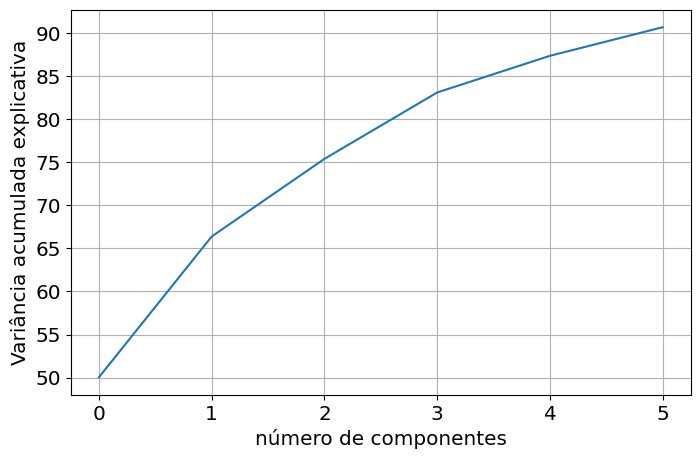

In [110]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.)
plt.xlabel('número de componentes')
plt.ylabel('Variância acumulada explicativa')
plt.grid(True)

### APLICAR OS ALGORITMOS DE CLASSIFICAÇÃO

In [113]:
pca = PCA(n_components = 0.90)
X_train_mod = pca.fit_transform(X_train_st)
X_test_mod = pca.transform(X_test_st)

### REGRESSÃO LOGÍSTICA

In [116]:
log = LogisticRegression(random_state=1234, solver = 'lbfgs')
log.fit(X_train_mod,y_train)
log_pred = log.predict(X_test_mod)
log_cm = confusion_matrix(y_test,log_pred)

acuracia_log = accuracy_score(y_pred=log_pred,y_true=y_test)
precisao_log = precision_score(y_pred=log_pred,y_true=y_test)
recall_log = recall_score(y_pred=log_pred,y_true=y_test)

In [120]:
print(acuracia_log,precisao_log,recall_log)
print(log_cm)

0.9912280701754386 1.0 0.9767441860465116
[[71  0]
 [ 1 42]]


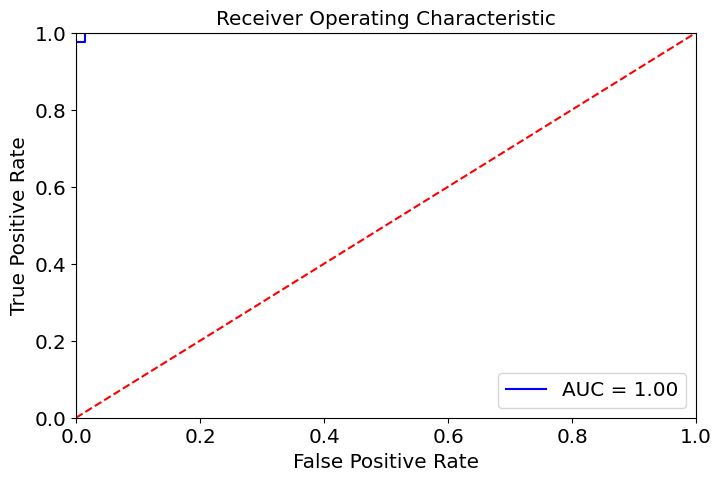

In [122]:
probs = log.predict_proba(X_test_mod)
preds = probs[:,1]
fpr_log, tpr_log, threshold = metrics.roc_curve(y_test, preds)
roc_auc_log = metrics.auc(fpr_log,tpr_log)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_log, tpr_log, 'b', label = 'AUC = %0.2f' % roc_auc_log)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SUPORTE DE VETORES DE MÁQUINA

In [125]:
from sklearn.svm import SVC

svm= SVC(kernel='linear', probability=True, class_weight='balanced')
svm.fit(X_train_mod,y_train)
svm_pred = svm.predict(X_test_mod)

acuracia_svm = accuracy_score(y_pred=svm_pred, y_true=y_test)
precisao_svm = precision_score(y_pred=svm_pred, y_true=y_test)
recall_svm = recall_score(y_pred=svm_pred, y_true=y_test)
svm_cm=confusion_matrix(y_test,svm_pred)

In [127]:
print(acuracia_svm,precisao_svm,recall_svm)
print(svm_cm)

0.9912280701754386 1.0 0.9767441860465116
[[71  0]
 [ 1 42]]


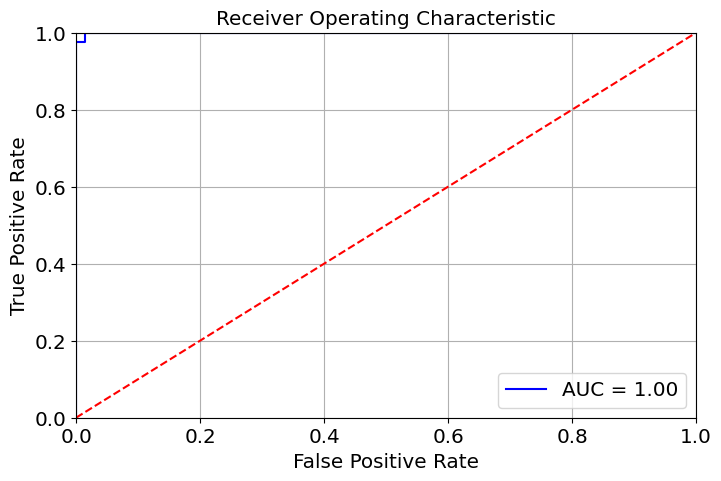

In [161]:
# calculate the fpr and tpr for all thresholds of the classification

probs = svm.predict_proba(X_test_mod)
preds = probs[:,1]
fpr_svm, tpr_svm, threshold = metrics.roc_curve(y_test, preds)
roc_auc_svm = metrics.auc(fpr_svm,tpr_svm)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_svm, tpr_svm, 'b', label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

### K-NN

In [132]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_mod,y_train)
neigh_pred = neigh.predict(X_test_mod)
neigh_cm=confusion_matrix(y_test,neigh_pred)

acuracia_neigh = accuracy_score(y_pred=neigh_pred ,y_true=y_test)
precisao_neigh = precision_score(y_pred=neigh_pred ,y_true=y_test)
recall_neigh = recall_score(y_pred=neigh_pred ,y_true=y_test)
neigh_cm=confusion_matrix(y_test,neigh_pred)

In [134]:
print(acuracia_neigh,precisao_neigh,recall_neigh)
print(neigh_cm)

0.9649122807017544 0.9534883720930233 0.9534883720930233
[[69  2]
 [ 2 41]]


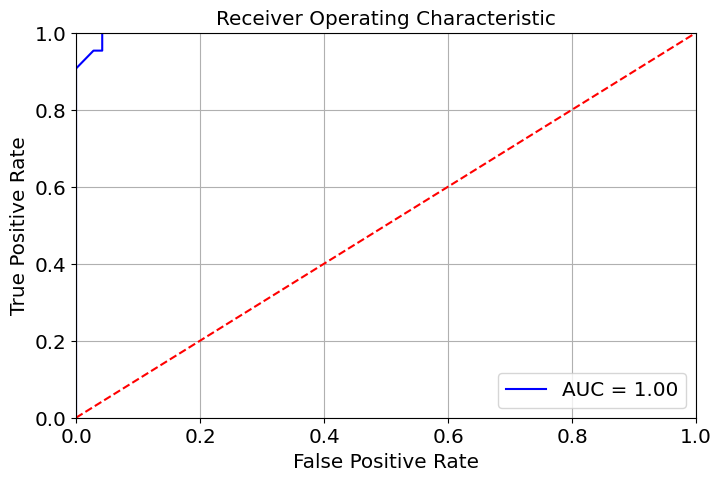

In [159]:
# calculate the fpr and tpr for all thresholds of the classification

probs = neigh.predict_proba(X_test_mod)
preds = probs[:,1]
fpr_neigh, tpr_neigh, threshold = metrics.roc_curve(y_test, preds)
roc_auc_neigh = metrics.auc(fpr_neigh,tpr_neigh)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_neigh, tpr_neigh, 'b', label = 'AUC = %0.2f' % roc_auc_neigh)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

### CLASSIFICADOR BAYESIANO

In [139]:
gnb = GaussianNB()
gnb.fit(X_train_mod,y_train)
gnb_pred = gnb.predict(X_test_mod)
gnb_cm=confusion_matrix(y_test,gnb_pred)

acuracia_gnb = accuracy_score(y_pred=gnb_pred ,y_true=y_test)
precisao_gnb = precision_score(y_pred=gnb_pred ,y_true=y_test)
recall_gnb = recall_score(y_pred=gnb_pred ,y_true=y_test)
gnb_cm=confusion_matrix(y_test,gnb_pred)


In [141]:
print(acuracia_gnb,precisao_gnb,recall_gnb)
print(gnb_cm)

0.956140350877193 0.9523809523809523 0.9302325581395349
[[69  2]
 [ 3 40]]


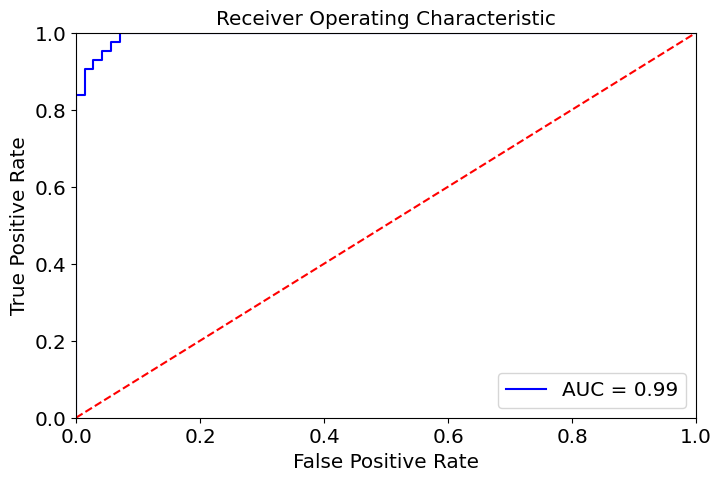

In [143]:
# calculate the fpr and tpr for all thresholds of the classification

probs = gnb.predict_proba(X_test_mod)
preds = probs[:,1]
fpr_gnb, tpr_gnb, threshold = metrics.roc_curve(y_test, preds)
roc_auc_gnb = metrics.auc(fpr_gnb,tpr_gnb)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_gnb, tpr_gnb, 'b', label = 'AUC = %0.2f' % roc_auc_gnb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### COMPARANDO AS MÉTRICAS DE ACURÁCIA, PRECISÃO E REVOCAÇÃO

In [157]:
def Tabela (CM):
    df = pd.DataFrame(data = metrica,
                      columns = ['Acurácia','Precisão','Revocação'],
                      index = ['Classificador Bayesiano',
                               'Suporte de Vetores de Máquina',
                               'Vizinhos mais Próximos - KNN',
                              'Regressão Logística'])
    return df 

In [148]:
metrica = [(acuracia_gnb, precisao_gnb , recall_gnb),
   (acuracia_svm, precisao_svm , recall_svm),
   (acuracia_neigh, precisao_neigh, recall_neigh),
   (acuracia_log, precisao_log, recall_log)] 

In [150]:
Tabela(metrica)

,Acurácia,Precisão,Revocação
Classificador Bayesiano,0.956140,0.952381,0.930233
Suporte de Vetores de Máquina,0.991228,1.000000,0.976744
Vizinhos mais Próximos,0.964912,0.953488,0.953488
Regressão Logística,0.991228,1.000000,0.976744


### CURVA ROC CONJUNTA

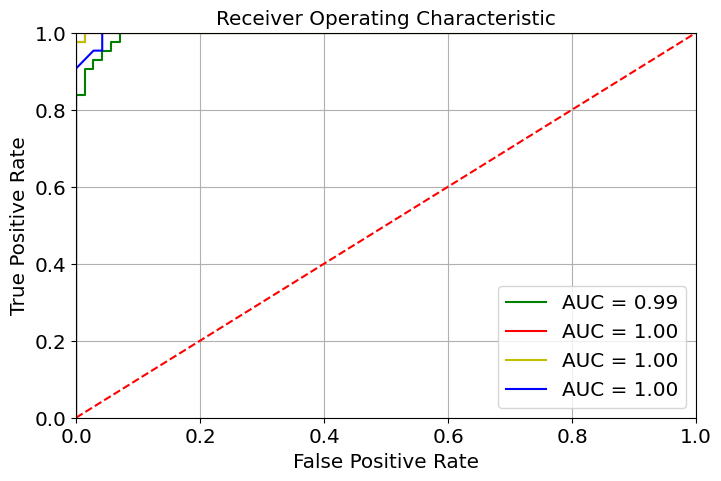

In [155]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_gnb, tpr_gnb, 'g', label = 'AUC = %0.2f' % roc_auc_gnb)
plt.plot(fpr_svm, tpr_svm, 'r', label = 'AUC = %0.2f' % roc_auc_svm)
plt.plot(fpr_log, tpr_log, 'y', label = 'AUC = %0.2f' % roc_auc_log)
plt.plot(fpr_neigh, tpr_neigh, 'b', label = 'AUC = %0.2f' % roc_auc_neigh)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()